#1-1) Dataset:

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bornabarazandeh","key":"c3822d193b48775a56594b07f3149e6d"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

##MNIST:

In [4]:
!kaggle datasets download -d hojjatk/mnist-dataset

Dataset URL: https://www.kaggle.com/datasets/hojjatk/mnist-dataset
License(s): copyright-authors
 91% 20.0M/22.0M [00:01<00:00, 29.2MB/s]
100% 22.0M/22.0M [00:01<00:00, 19.4MB/s]


In [5]:
!mkdir mnsit

In [6]:
!unzip -q mnist-dataset.zip -d mnsit

In [7]:
!ls

kaggle.json  mnist-dataset.zip	mnsit  sample_data


In [8]:
import matplotlib.pyplot as plt

training_images_filepath = "/content/mnsit/train-images-idx3-ubyte/train-images-idx3-ubyte"
training_labels_filepath = "/content/mnsit/train-labels-idx1-ubyte/train-labels-idx1-ubyte"
test_images_filepath = "/content/mnsit/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte"
test_labels_filepath = "/content/mnsit/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte"

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);
        index += 1

In [9]:
import numpy as np
import struct
from array import array
from os.path  import join

class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img

        return images, labels

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

In [10]:
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

Shape of the Train Images: (60000, 28, 28)


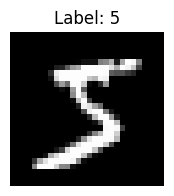

In [11]:
print("Shape of the Train Images:", np.array(x_train).shape)

plt.figure(figsize=(2, 2))
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.axis('off')
plt.show()

Shape of the Test Images: (10000, 28, 28)


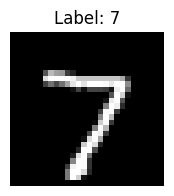

In [12]:
print("Shape of the Test Images:", np.array(x_test).shape)

plt.figure(figsize=(2, 2))
plt.imshow(x_test[0], cmap='gray')
plt.title(f'Label: {y_test[0]}')
plt.axis('off')
plt.show()

Splitting 25%:

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

print("Shape of x_train:", np.array(x_train).shape)
print("Shape of x_val:", np.array(x_val).shape)
print("Shape of y_train:", np.array(y_train).shape)
print("Shape of y_val:", np.array(y_val).shape)

Shape of x_train: (45000, 28, 28)
Shape of x_val: (15000, 28, 28)
Shape of y_train: (45000,)
Shape of y_val: (15000,)


Normalization:

In [14]:
def Normalize(input):
  input = np.array(input)
  output = input.astype('float32') / 255.0
  return output

x_train = Normalize(x_train)
x_val = Normalize(x_val)
x_test = Normalize(x_test)

##Fashion MNIST:

In [15]:
!kaggle datasets download -d zalando-research/fashionmnist

Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist
License(s): other
 99% 68.0M/68.8M [00:02<00:00, 42.1MB/s]
100% 68.8M/68.8M [00:02<00:00, 30.7MB/s]


In [16]:
!mkdir fashion
!unzip -q fashionmnist.zip -d fashion

In [17]:
training_images_fashion = "/content/fashion/train-images-idx3-ubyte"
training_labels_fashion = "/content/fashion/train-labels-idx1-ubyte"
test_images_fashion = "/content/fashion/t10k-images-idx3-ubyte"
test_labels_fashion = "/content/fashion/t10k-labels-idx1-ubyte"

mnist_fashion_dataloader = MnistDataloader(training_images_fashion, training_labels_fashion, test_images_fashion, test_labels_fashion)
(x_train_f, y_train_f), (x_test_f, y_test_f) = mnist_fashion_dataloader.load_data()

Shape of the Train Images of FashionMNIST: (60000, 28, 28)


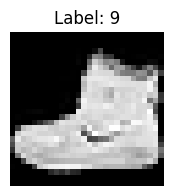

In [18]:
print("Shape of the Train Images of FashionMNIST:", np.array(x_train_f).shape)

plt.figure(figsize=(2, 2))
plt.imshow(x_train_f[0], cmap='gray')
plt.title(f'Label: {y_train_f[0]}')
plt.axis('off')
plt.show()

Shape of the Test Images of FashionMNIST: (10000, 28, 28)


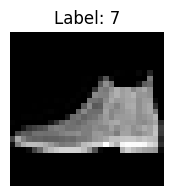

In [19]:
print("Shape of the Test Images of FashionMNIST:", np.array(x_test_f).shape)

plt.figure(figsize=(2, 2))
plt.imshow(x_test_f[0], cmap='gray')
plt.title(f'Label: {y_test[0]}')
plt.axis('off')
plt.show()

Splitting 25%:

In [20]:
from sklearn.model_selection import train_test_split

x_train_f, x_val_f, y_train_f, y_val_f = train_test_split(x_train_f, y_train_f, test_size=0.25, random_state=42)

print("Shape of x_train:", np.array(x_train_f).shape)
print("Shape of x_val:", np.array(x_val_f).shape)
print("Shape of y_train:", np.array(y_train_f).shape)
print("Shape of y_val:", np.array(y_val_f).shape)

Shape of x_train: (45000, 28, 28)
Shape of x_val: (15000, 28, 28)
Shape of y_train: (45000,)
Shape of y_val: (15000,)


Normalization:

In [21]:
def Normalize(input):
  input = np.array(input)
  output = input.astype('float32') / 255.0
  return output

x_train_f = Normalize(x_train_f)
x_val_f = Normalize(x_val_f)
x_test_f = Normalize(x_test_f)

#1-2) Netwrok:

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Flatten, Reshape
from tensorflow.keras.models import Model

Encoder:

In [23]:
input_img = Input(shape=(28, 28, 1))


x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

flatten_layer = Flatten()(encoded)

latent_dim = 8
latent_vector = Dense(latent_dim, activation='relu')(flatten_layer)

encoder = Model(input_img, latent_vector, name='encoder')

In [24]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 4)           292 

Decoder:

In [25]:
x = Dense(7 * 7 * 32, activation='relu')(latent_vector)
x = Reshape((7, 7, 32))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded_img = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

decoder = Model(inputs=latent_vector, outputs=decoded_img, name='decoder')

Autoencoder Model:

In [26]:
autoencoder_output = decoder(encoder(input_img))
autoencoder = Model(input_img, autoencoder_output, name='autoencoder')

autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 8)                 2132      
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         17737     
                                                                 
Total params: 19869 (77.61 KB)
Trainable params: 19869 (77.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#1-3) Training Netwrok:

In [27]:
def build_autoencoder():
    autoencoder_input = Input(shape=(28, 28, 1))
    encoder_output = encoder(autoencoder_input)
    decoder_output = decoder(encoder_output)
    autoencoder_model = Model(inputs=autoencoder_input, outputs=decoder_output, name='autoencoder')
    return autoencoder_model

###Creating Models:

In [28]:
MNIST = build_autoencoder()
MNIST.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 8)                 2132      
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         17737     
                                                                 
Total params: 19869 (77.61 KB)
Trainable params: 19869 (77.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
FASH = build_autoencoder()
FASH.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 8)                 2132      
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         17737     
                                                                 
Total params: 19869 (77.61 KB)
Trainable params: 19869 (77.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Optimizer and Metrics:

In [30]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError

optimizer = Adam(learning_rate=0.001)
loss = 'mse'
metrics = ['mae']

### Compile:

In [31]:
MNIST.compile(optimizer=optimizer, loss=loss, metrics=metrics)
FASH.compile(optimizer=optimizer, loss=loss, metrics=metrics)

### MNIST Training:

In [32]:
history_mnist = MNIST.fit(x_train, x_train,
                                epochs=10,
                                batch_size=256,
                                shuffle=True,
                                validation_data=(x_val, x_val))

Epoch 1/10
176/176 [==============================] - 10s 16ms/step - loss: 0.0829 - mae: 0.1799 - val_loss: 0.0613 - val_mae: 0.1370
Epoch 2/10
176/176 [==============================] - 1s 8ms/step - loss: 0.0532 - mae: 0.1204 - val_loss: 0.0456 - val_mae: 0.1045
Epoch 3/10
176/176 [==============================] - 2s 11ms/step - loss: 0.0411 - mae: 0.0963 - val_loss: 0.0382 - val_mae: 0.0902
Epoch 4/10
176/176 [==============================] - 2s 10ms/step - loss: 0.0366 - mae: 0.0871 - val_loss: 0.0354 - val_mae: 0.0843
Epoch 5/10
176/176 [==============================] - 1s 8ms/step - loss: 0.0345 - mae: 0.0827 - val_loss: 0.0338 - val_mae: 0.0814
Epoch 6/10
176/176 [==============================] - 1s 8ms/step - loss: 0.0334 - mae: 0.0804 - val_loss: 0.0334 - val_mae: 0.0809
Epoch 7/10
176/176 [==============================] - 1s 8ms/step - loss: 0.0325 - mae: 0.0788 - val_loss: 0.0324 - val_mae: 0.0785
Epoch 8/10
176/176 [==============================] - 1s 9ms/step - loss

###MNIST Plots

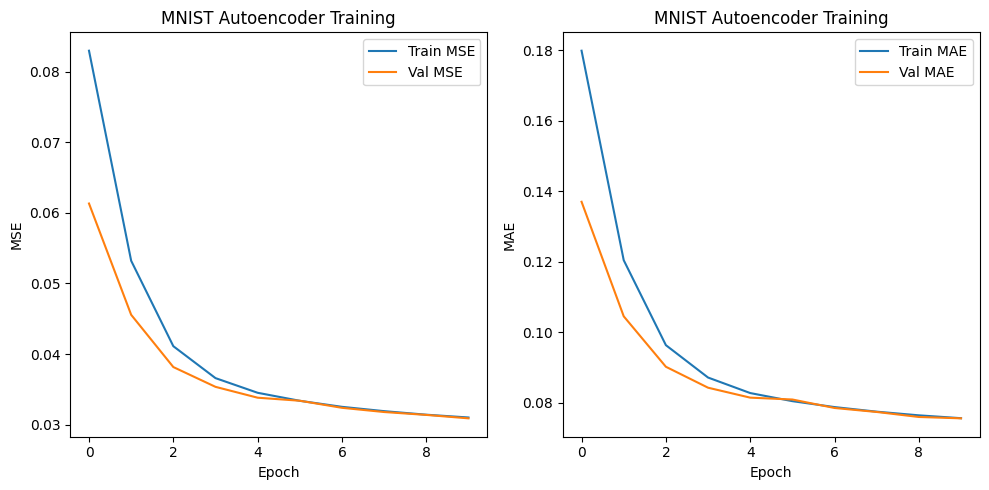

In [33]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_mnist.history['loss'], label='Train MSE')
plt.plot(history_mnist.history['val_loss'], label='Val MSE')
plt.title('MNIST Autoencoder Training')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mnist.history['mae'], label='Train MAE')
plt.plot(history_mnist.history['val_mae'], label='Val MAE')
plt.title('MNIST Autoencoder Training')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

### Fashion MNIST Training:

In [34]:
history_fashion = FASH.fit(x_train_f, x_train_f,
                                    epochs=10,
                                    batch_size=256,
                                    shuffle=True,
                                    validation_data=(x_val_f, x_val_f))

Epoch 1/10
176/176 [==============================] - 3s 11ms/step - loss: 0.0332 - mae: 0.1075 - val_loss: 0.0266 - val_mae: 0.0940
Epoch 2/10
176/176 [==============================] - 1s 8ms/step - loss: 0.0251 - mae: 0.0899 - val_loss: 0.0241 - val_mae: 0.0871
Epoch 3/10
176/176 [==============================] - 2s 10ms/step - loss: 0.0235 - mae: 0.0856 - val_loss: 0.0229 - val_mae: 0.0838
Epoch 4/10
176/176 [==============================] - 2s 11ms/step - loss: 0.0227 - mae: 0.0834 - val_loss: 0.0224 - val_mae: 0.0828
Epoch 5/10
176/176 [==============================] - 2s 9ms/step - loss: 0.0221 - mae: 0.0818 - val_loss: 0.0219 - val_mae: 0.0818
Epoch 6/10
176/176 [==============================] - 1s 8ms/step - loss: 0.0216 - mae: 0.0806 - val_loss: 0.0216 - val_mae: 0.0803
Epoch 7/10
176/176 [==============================] - 1s 8ms/step - loss: 0.0213 - mae: 0.0796 - val_loss: 0.0213 - val_mae: 0.0795
Epoch 8/10
176/176 [==============================] - 2s 9ms/step - loss:

### Fashion MNIST Plots:

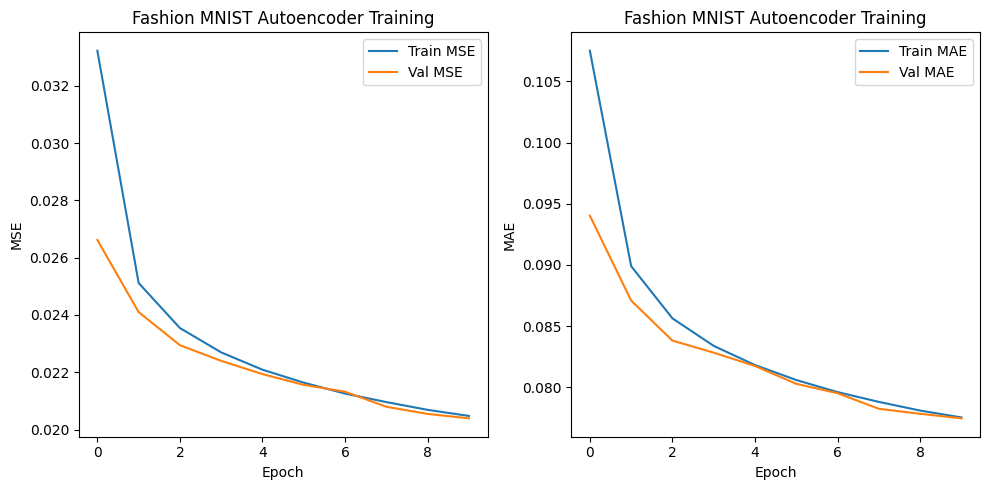

In [35]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_fashion.history['loss'], label='Train MSE')
plt.plot(history_fashion.history['val_loss'], label='Val MSE')
plt.title('Fashion MNIST Autoencoder Training')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_fashion.history['mae'], label='Train MAE')
plt.plot(history_fashion.history['val_mae'], label='Val MAE')
plt.title('Fashion MNIST Autoencoder Training')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

# 1-4) Evaluation and Visualization

Evaluate MNIST model

In [36]:
mse_mnist, mae_mnist = MNIST.evaluate(x_test, x_test, verbose=0)
print("MNIST Test MSE:", mse_mnist)
print("MNIST Test MAE:", mae_mnist)

MNIST Test MSE: 0.06090833619236946
MNIST Test MAE: 0.12695148587226868


Evaluate Fashion MNIST model

In [37]:
mse_fashion, mae_fashion = FASH.evaluate(x_test_f, x_test_f, verbose=0)
print("Fashion MNIST Test MSE:", mse_fashion)
print("Fashion MNIST Test MAE:", mae_fashion)

Fashion MNIST Test MSE: 0.02043248899281025
Fashion MNIST Test MAE: 0.07785546779632568


Plotting Images:

In [38]:
decoded_imgs_mnist = MNIST.predict(x_test)
decoded_imgs_fash = FASH.predict(x_test_f)

313/313 [==============================] - 1s 2ms/step


In [40]:
def plot_class_images(original_images, reconstructed_images, labels, title, num_samples=10):
    unique_labels = np.unique(labels)
    num_classes = len(unique_labels)

    assert num_classes >= num_samples, "Not enough."

    plt.figure(figsize=(20, 4))

    for i, label in enumerate(unique_labels[:num_samples]):
        idx = np.where(labels == label)[0][0]

        original_img = original_images[idx]
        reconstructed_img = reconstructed_images[idx]

        plt.subplot(2, num_samples, i + 1)
        plt.imshow(original_img.reshape(28, 28), cmap='gray')
        plt.title(f'Class {int(label)}')
        plt.axis('off')

        plt.subplot(2, num_samples, i + 1 + num_samples)
        plt.imshow(reconstructed_img.reshape(28, 28), cmap='gray')
        plt.axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


MNIST:

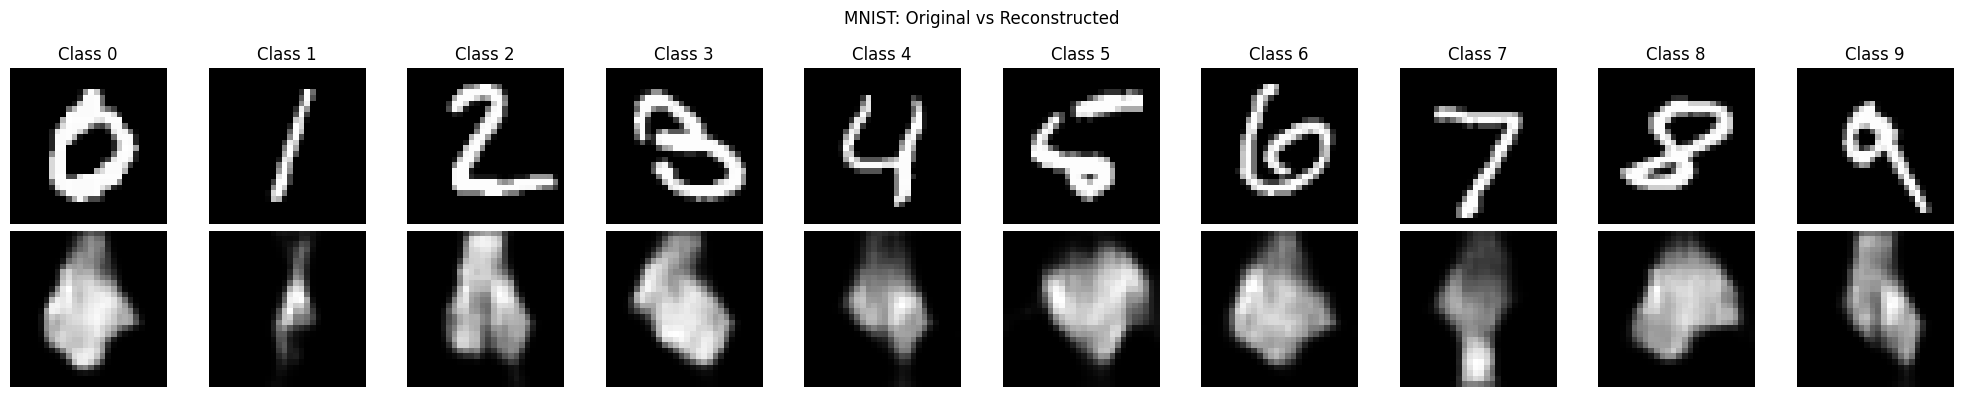

In [41]:
plot_class_images(x_test, decoded_imgs_mnist, y_test, title='MNIST: Original vs Reconstructed')

Fashion MNIST:

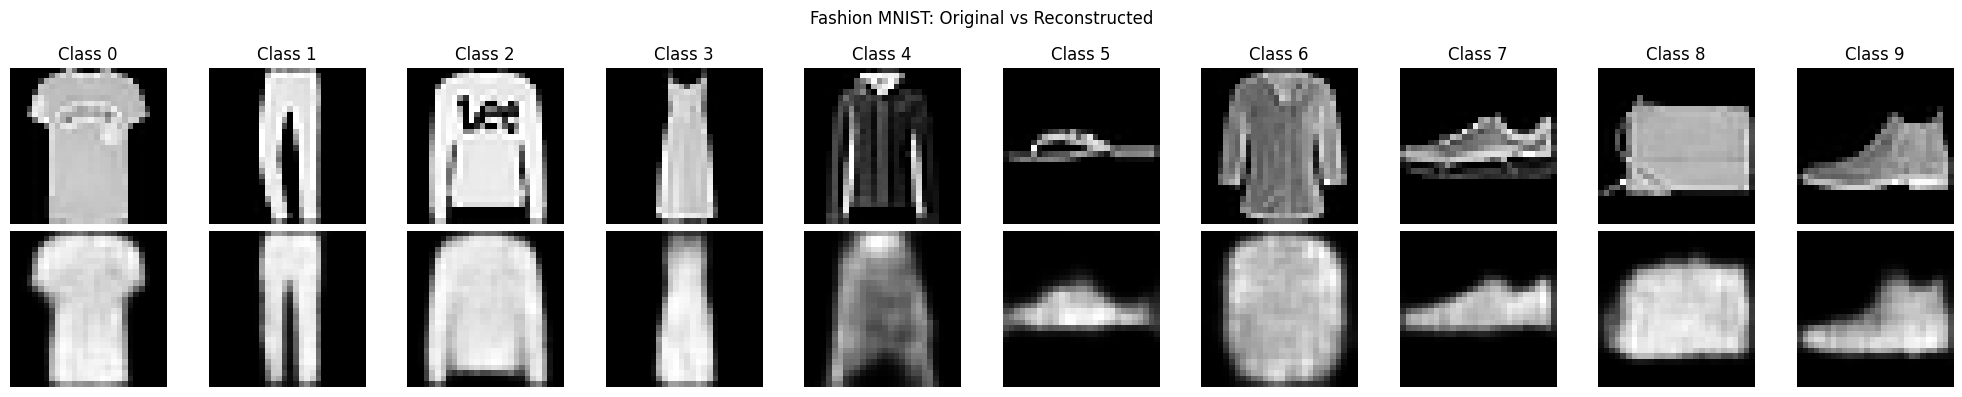

In [42]:
plot_class_images(x_test_f, decoded_imgs_fash, y_test_f, title='Fashion MNIST: Original vs Reconstructed')

Saving h5

In [43]:
from google.colab import drive

drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:
MNIST.save('/content/drive/My Drive/Models/MNIST.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
FASH.save('/content/drive/My Drive/Models/FASH.h5')
!ls '/content/drive/My Drive/Models/'

FASH.h5  MNIST.h5


Reading h5

In [ ]:
from tensorflow.keras.models import load_model

mnist_path = '/content/drive/My Drive/Models/MNIST.h5'
fash_path = '/content/drive/My Drive/Models/FASH.h5'

MNIST = load_model(mnist_path)
FASH = load_model(fash_path)

#1-5) Clustering:

feature and label extraction:

In [44]:
def extract_features_and_labels(encoder_model, x_train, y_train, x_val, y_val, x_test, y_test):

    train_features = encoder_model.predict(x_train)
    val_features = encoder_model.predict(x_val)
    test_features = encoder_model.predict(x_test)


    all_features = np.concatenate((train_features, val_features, test_features), axis=0)


    all_labels = np.concatenate((y_train, y_val, y_test), axis=0)

    return all_features, all_labels

In [45]:
mnist_features, mnist_labels = extract_features_and_labels(encoder_model=MNIST.get_layer('encoder'),
                                                          x_train=x_train, y_train=y_train,
                                                          x_val=x_val, y_val=y_val,
                                                          x_test=x_test, y_test=y_test)


fashion_features, fashion_labels = extract_features_and_labels(encoder_model=FASH.get_layer('encoder'),
                                                              x_train=x_train_f, y_train=y_train_f,
                                                              x_val=x_val_f, y_val=y_val_f,
                                                              x_test=x_test_f, y_test=y_test_f)

313/313 [==============================] - 1s 2ms/step


Optimal Number of Classes:

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def find_optimal_clusters(features):
    silhouette_scores = []
    num_clusters_range = range(5, 16)

    for n_clusters in num_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(features)
        silhouette_avg = silhouette_score(features, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"For n_clusters = {n_clusters}, silhouette score = {silhouette_avg:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(num_clusters_range, silhouette_scores, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.grid(True)
    plt.show()

MNIST Number of Clusters:

For n_clusters = 5, silhouette score = 0.1702
For n_clusters = 6, silhouette score = 0.1697
For n_clusters = 7, silhouette score = 0.1698
For n_clusters = 8, silhouette score = 0.1690
For n_clusters = 9, silhouette score = 0.1660
For n_clusters = 10, silhouette score = 0.1634
For n_clusters = 11, silhouette score = 0.1602
For n_clusters = 12, silhouette score = 0.1594
For n_clusters = 13, silhouette score = 0.1587
For n_clusters = 14, silhouette score = 0.1610
For n_clusters = 15, silhouette score = 0.1609


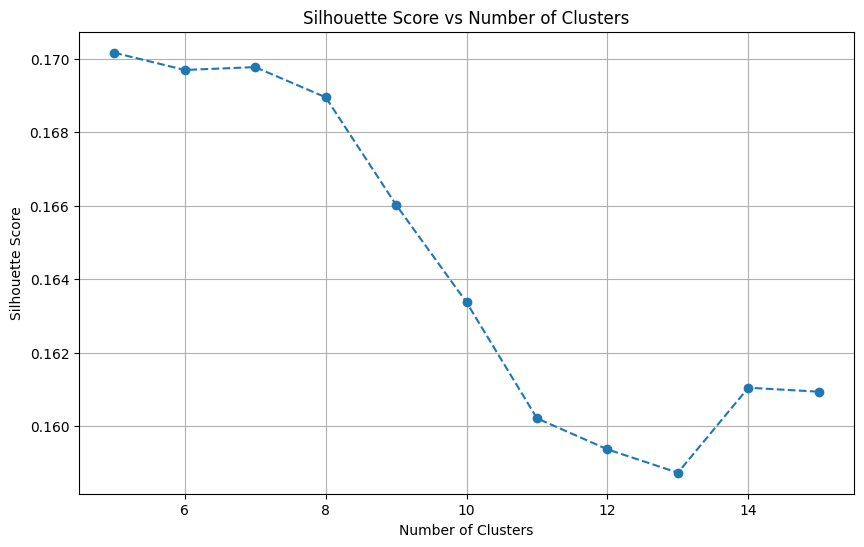

In [47]:
find_optimal_clusters(mnist_features)

Fashion MNIST Number of Clusters:

For n_clusters = 5, silhouette score = 0.3249
For n_clusters = 6, silhouette score = 0.3101
For n_clusters = 7, silhouette score = 0.3283
For n_clusters = 8, silhouette score = 0.3049
For n_clusters = 9, silhouette score = 0.2988
For n_clusters = 10, silhouette score = 0.2817
For n_clusters = 11, silhouette score = 0.2824
For n_clusters = 12, silhouette score = 0.2746
For n_clusters = 13, silhouette score = 0.2801
For n_clusters = 14, silhouette score = 0.2580
For n_clusters = 15, silhouette score = 0.2651


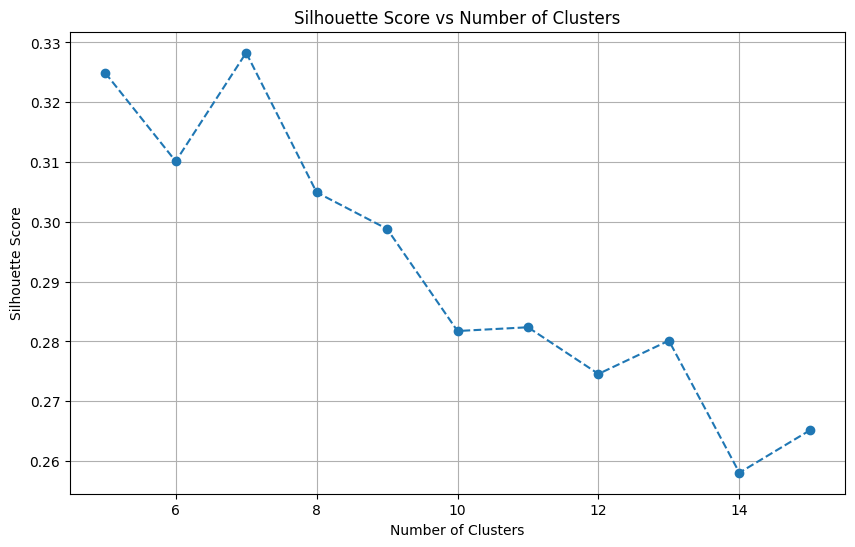

In [48]:
find_optimal_clusters(fashion_features)

Clustering:

In [49]:
import pandas as pd
import seaborn as sns

def plot_cluster_analysis(features, labels, n_clusters, dataset_name):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(features)

    cluster_label_counts = np.zeros((n_clusters, 10))

    for cluster in range(n_clusters):
        cluster_mask = (cluster_labels == cluster)
        cluster_labels_in_cluster = labels[cluster_mask]
        unique_labels, label_counts = np.unique(cluster_labels_in_cluster, return_counts=True)
        cluster_label_counts[cluster, unique_labels.astype(int)] = label_counts

    data = []
    for cluster in range(n_clusters):
        for label in range(10):
            data.append({
                'Cluster': cluster,
                'Original Label': label,
                'Count': cluster_label_counts[cluster, label]
            })

    df = pd.DataFrame(data)

    plt.figure(figsize=(14, 8))
    sns.barplot(x='Cluster', y='Count', hue='Original Label', data=df, palette='tab10')

    plt.title(f'Number of each label in different Clusters ({dataset_name})', fontsize=14)
    plt.xlabel('Clusters', fontsize=12)
    plt.ylabel('Number of each label in every cluster', fontsize=12)
    plt.legend(title='Labels', loc='upper right', bbox_to_anchor=(1.1, 1))

    plt.show()


MNIST Clustering:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


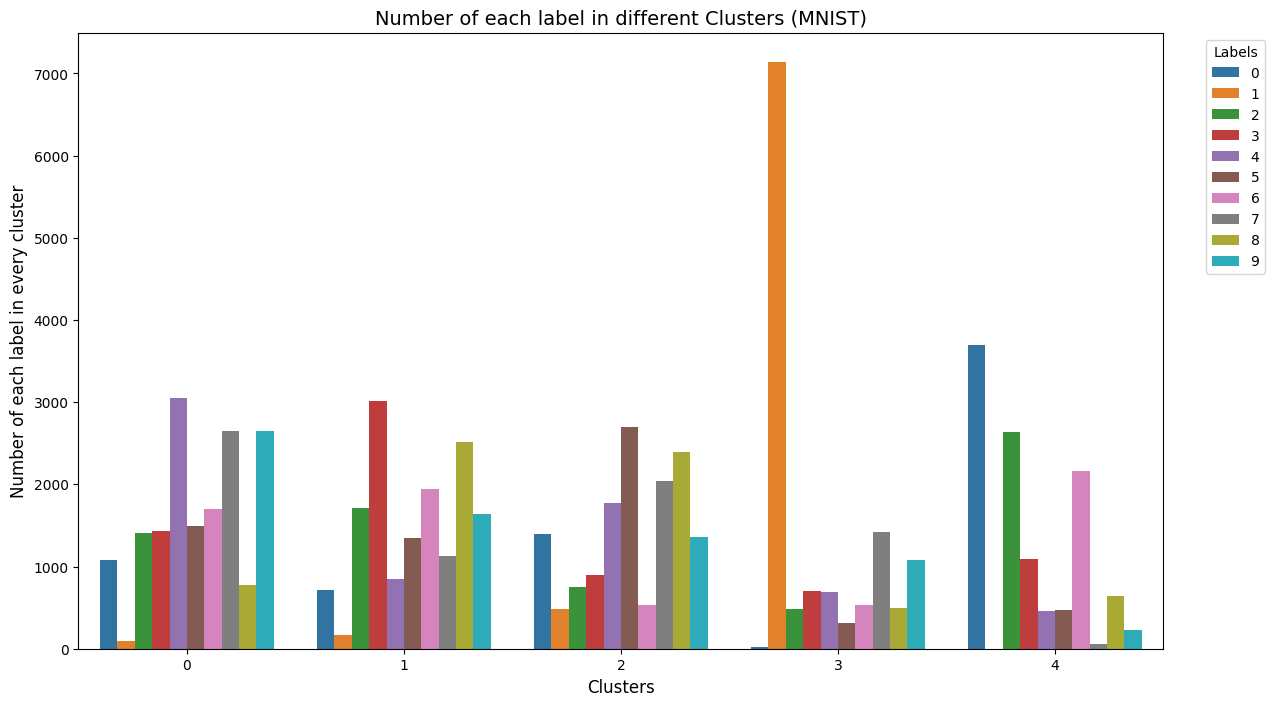

In [50]:
plot_cluster_analysis(mnist_features, mnist_labels, n_clusters=5, dataset_name='MNIST')

Fashion MNIST Clustering:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


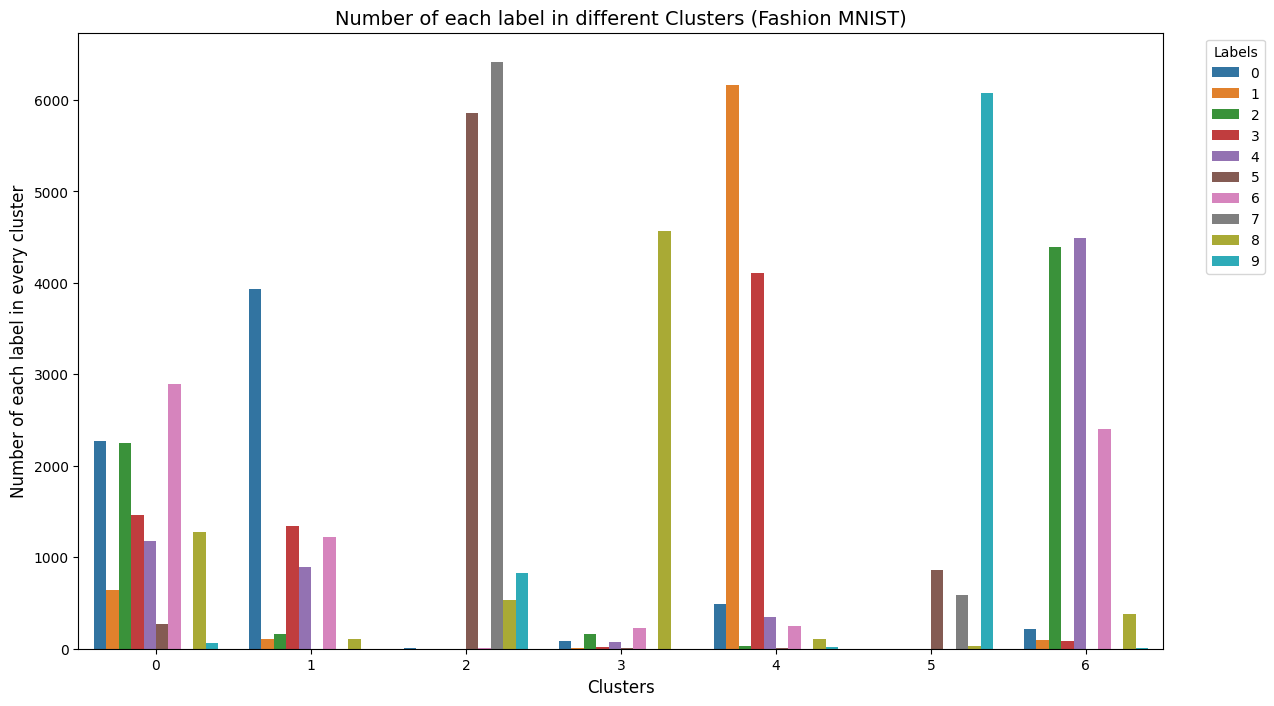

In [51]:
plot_cluster_analysis(fashion_features, fashion_labels, n_clusters=7, dataset_name='Fashion MNIST')